# TASK 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
customers = pd.read_csv("E:/Project of DS/Zeotap/Customers.csv")
products = pd.read_csv("E:/Project of DS/Zeotap/Products.csv")
transactions = pd.read_csv("E:/Project of DS/Zeotap/Transactions.csv")

In [6]:
# 1. Overview of the datasets
print("Customers Data:")
print(customers.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [8]:
print("Products Data:")
print(products.head())

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [10]:
print("Transactions Data:")
print(transactions.head())

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [12]:
# 2. Data Cleaning: Checking for missing values
print("Missing values in customers data:")
print(customers.isnull().sum())

Missing values in customers data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [14]:
print("Missing values in products data:")
print(products.isnull().sum())

Missing values in products data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [16]:
print("Missing values in transactions data:")
print(transactions.isnull().sum())

Missing values in transactions data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [18]:
# 3. EDA - Customers by Region
customers_by_region = customers['Region'].value_counts()
print(customers_by_region)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


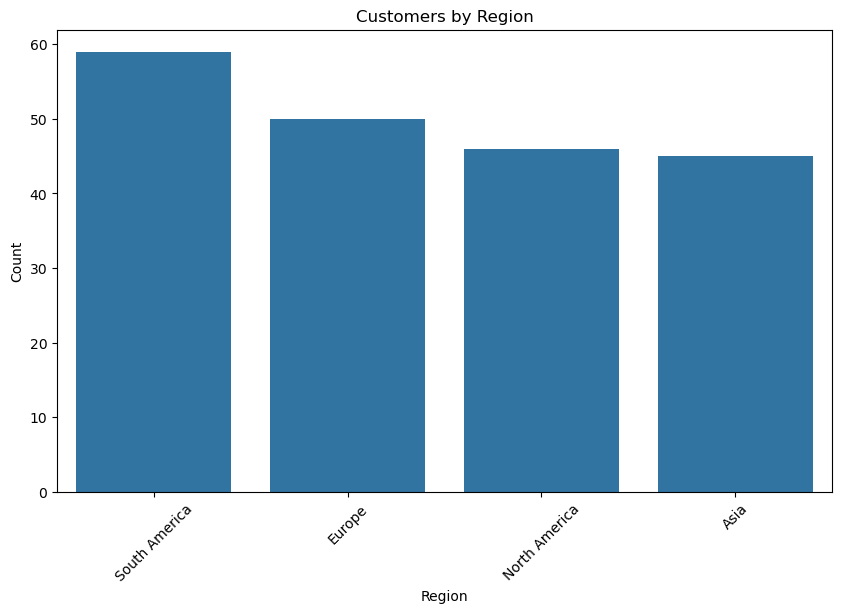

In [20]:
# Plot Customers by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=customers_by_region.index, y=customers_by_region.values)
plt.title('Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Business Insight 1: Regional Distribution of Customers
* The majority of customers are concentrated in specific regions.
* Understanding regional distribution allows for targeted marketing and service offerings tailored to customers in high-density regions, enhancing customer satisfaction and sales conversion rates.

In [22]:
# 4. EDA - Products by Category
products_by_category = products['Category'].value_counts()
print(products_by_category)

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


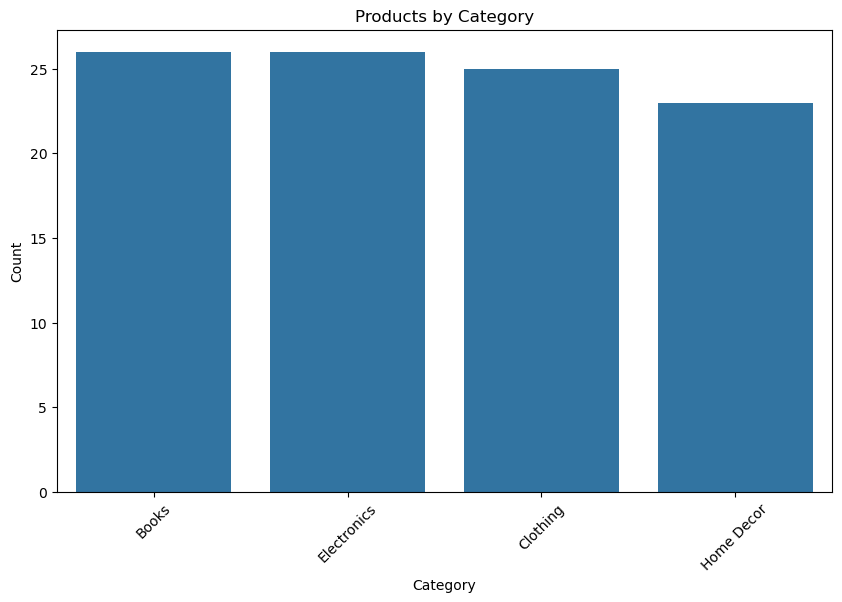

In [30]:
# Plot Products by Category
plt.figure(figsize=(10, 6))
sns.barplot(x=products_by_category.index, y=products_by_category.values)
plt.title('Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Business Insight 2: Product Category Trends
* The distribution of products across categories shows some categories are more popular than others.
* Retailers should prioritize stocking high-demand product categories to maximize sales. Cross-promotions and bundle offers can further boost sales in less popular categories.

In [32]:
# 5. EDA - Total Transactions by Region
transactions_by_region = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
transactions_by_region_count = transactions_by_region['Region'].value_counts()

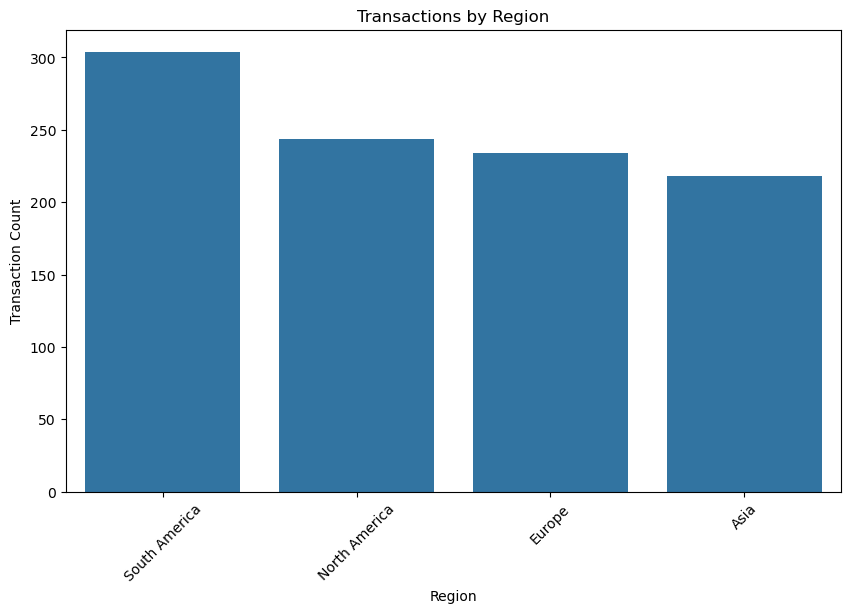

In [34]:
# Plot Total Transactions by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=transactions_by_region_count.index, y=transactions_by_region_count.values)
plt.title('Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()

## Business Insight 3: Transaction Distribution by Region
* Analyzing transactions by region reveals that some regions contribute significantly more to sales than others.
* By identifying these regions, businesses can focus their marketing efforts on underperforming areas to increase engagement and improve overall sales.

In [36]:
# 6. EDA - Most Sold Products
most_sold_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
most_sold_products_info = products[products['ProductID'].isin(most_sold_products.index)]

In [38]:
# Display top 10 most sold products
print("Top 10 most sold products:")
print(most_sold_products_info[['ProductName', 'Category']])

Top 10 most sold products:
              ProductName     Category
19      ActiveWear Jacket     Clothing
27    HomeSense Desk Lamp   Home Decor
28     TechPro Headphones  Electronics
47       TechPro Cookbook        Books
53     SoundWave Cookbook        Books
56  ActiveWear Smartphone  Electronics
58        SoundWave Jeans     Clothing
60    HomeSense Desk Lamp   Home Decor
61        HomeSense Novel        Books
78         ActiveWear Rug   Home Decor


## Business Insight 4: High Demand for Specific Products
* The top 10 most sold products are crucial for revenue generation.
* Identifying these products can help optimize inventory management, ensuring the  best-selling items are always in stock. Additionally, these products can be used for targeted promotions and personalized marketing.

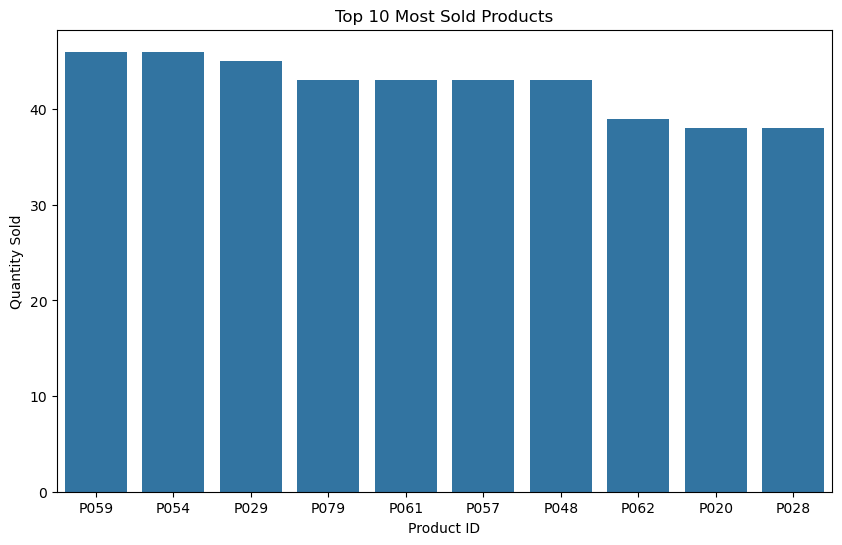

In [40]:
# Plot most sold products
plt.figure(figsize=(10, 6))
sns.barplot(x=most_sold_products.index, y=most_sold_products.values)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.show()

## Business Insight 5: Customer Segmentation Opportunities
* Customer distribution across regions and product preferences suggests that segmentation based on geographic and product interests can improve targeted promotions.
* By offering personalized recommendations and tailored pricing, businesses can increase customer retention and loyalty.